In [1]:
import ptime

from lasy.laser import Laser
from lasy.profiles.gaussian_profile import GaussianProfile
from lasy.optical_elements import ParabolicMirror

import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c

import full_field

dim = "rt"

In [2]:
l_w = 10.54e-7
f0 = 7e-2
delta = 5e-3
w = 1e-3
tau = 1.5e-14
E = 6.2
des_dt = 1.39e-16 # PIConGPU Standardwert
w0 = f0 * l_w / w / np.pi
vf = 300000000
print("w0 =", w0)
print("w/w0 =",w/w0)
if dim == "xyt":
    npoints = (int(2*w/w0), int(2*w/w0), 200)
    npoints_prop = (int(10*w/w0), int(10*w/w0), 200)
    hi = (1.1*w, 1.1*w, 4.5*tau)
    lo = (-1.1*w, -1.1*w, -5.*tau)
elif dim == "rt":
    p_per_r = 2
    picpoints_per_p = 2
    print("points in file:", int(1024/picpoints_per_p))
    spacing = 0.1772e-6 * p_per_r * 2 # PIConGPU Standardwert
    npoints = (int(5*w/spacing), 800)
    print("approximate file size:", int(1024/picpoints_per_p)*int(1024/picpoints_per_p)/1024*4+100, "MB")
    cut_frac = 0.3
    hi = (5*w, 9*tau)
    lo = (0., -15*tau)
    offset_frac = hi[1]/2 / (hi[1]-lo[1])
    print(offset_frac)
print(npoints)

ptime.ptime()

w0 = 2.3484903402640077e-05
w/w0 = 42.580545589452335
points in file: 512
approximate file size: 1124.0 MB
0.18749999999999997
(7054, 800)
time: 0.22447858651479086 min


In [3]:
profile = GaussianProfile(l_w, (1,0), E, w, tau, 0.0)
laser = Laser(dim, lo, hi, npoints, profile)
ptime.ptime()

time: 0.24002861579259235 min


time: 0.2616650700569153 min


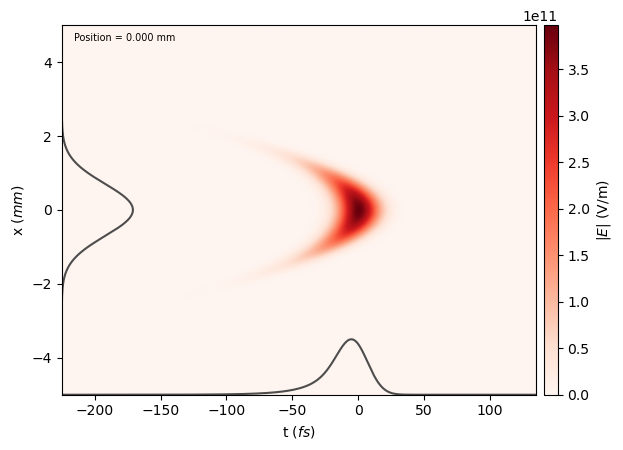

In [4]:
parabola = ParabolicMirror(f0)
laser.apply_optics(parabola)
laser.show()
ptime.ptime()

0.0683560567618152
time steps to focus: 39450.39128073632
Available backends are: NP
NP is chosen


  0%|          | 00:00<? [?it/s]

Extracting full field
Offsetting by 18.74 percent of the original field


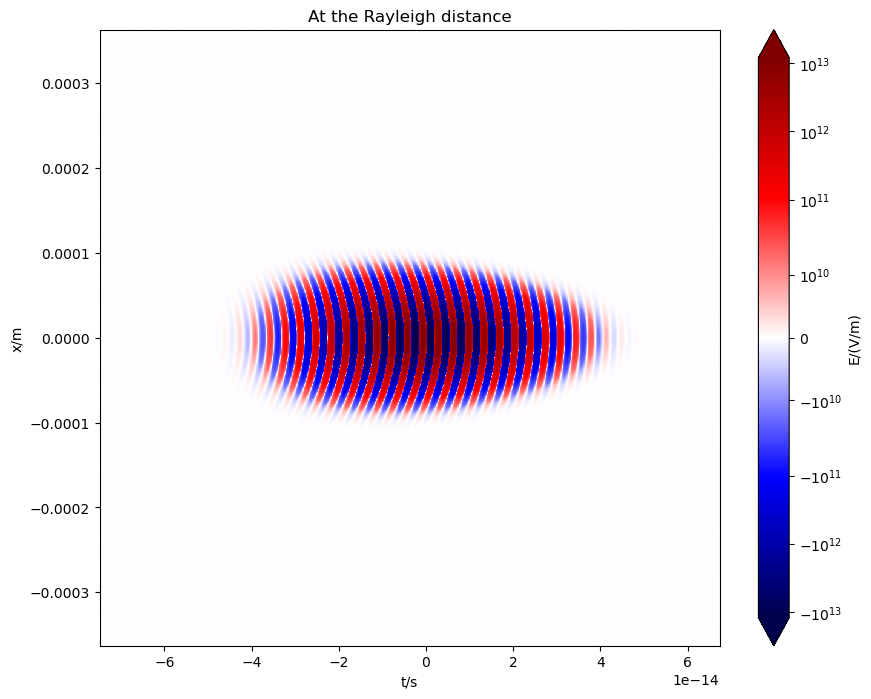

time: 3.1432404637336733 min


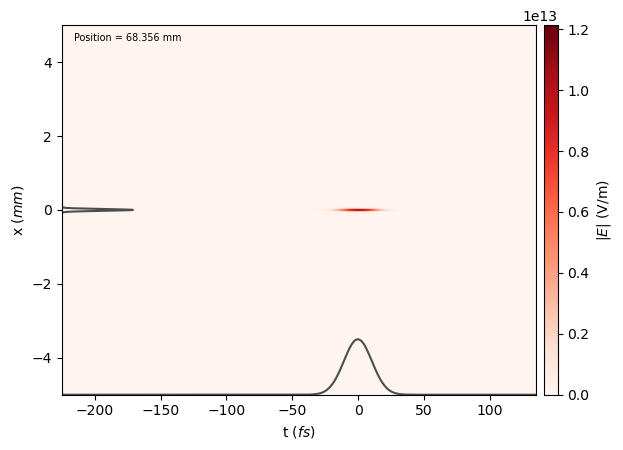

In [5]:
zr = np.pi * w0**2 / l_w
l = f0 - zr
print(l)
print("time steps to focus:", zr / c / des_dt)
laser.propagate(l)
full_field.show_field(laser, Nt=1024, Nr=512, offset_frac=offset_frac, forced_dt=des_dt, linthresh_frac=0.001, title="At the Rayleigh distance")
laser.show()
ptime.ptime()

In [6]:
from lasy.utils.laser_utils import get_w0
print("w = ", get_w0(laser.grid, laser.dim))

w =  3.2777043815964476e-05


extracting full field...


  0%|          | 00:00<? [?it/s]

Offsetting by 18.74 percent of the original field


  0%|          | 00:00<? [?it/s]

saving...
transposing
Data type: float32
flushing


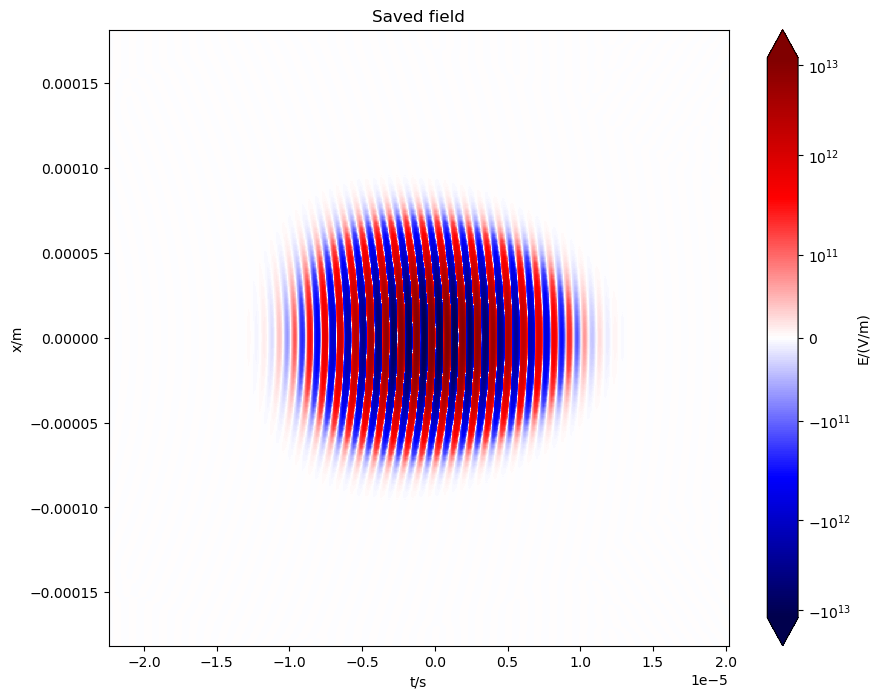

done
time: 9.766495378812154 min


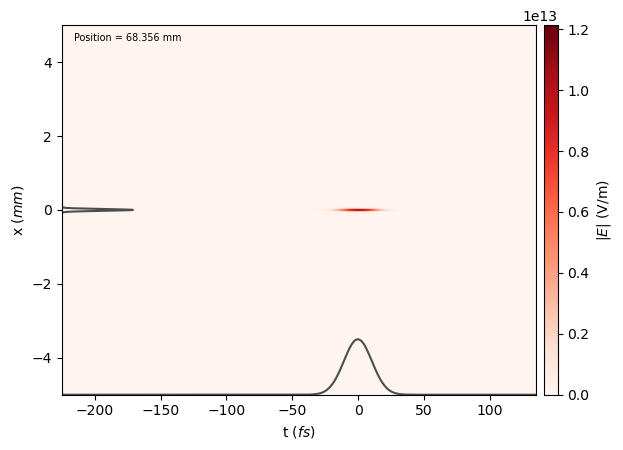

In [8]:
full_field.laser_to_openPMD(laser, "parabol", Nt=1024, Nx=int(1024/picpoints_per_p), Ny=int(1024/picpoints_per_p), conversion_safety=1.5, iteration=0,
                            points_between_r=p_per_r, forced_dt=des_dt, offset_frac=offset_frac, file_format="bp", data_step=picpoints_per_p, show=True)
laser.show()
ptime.ptime()

Extracting full field
Offsetting by 18.74 percent of the original field


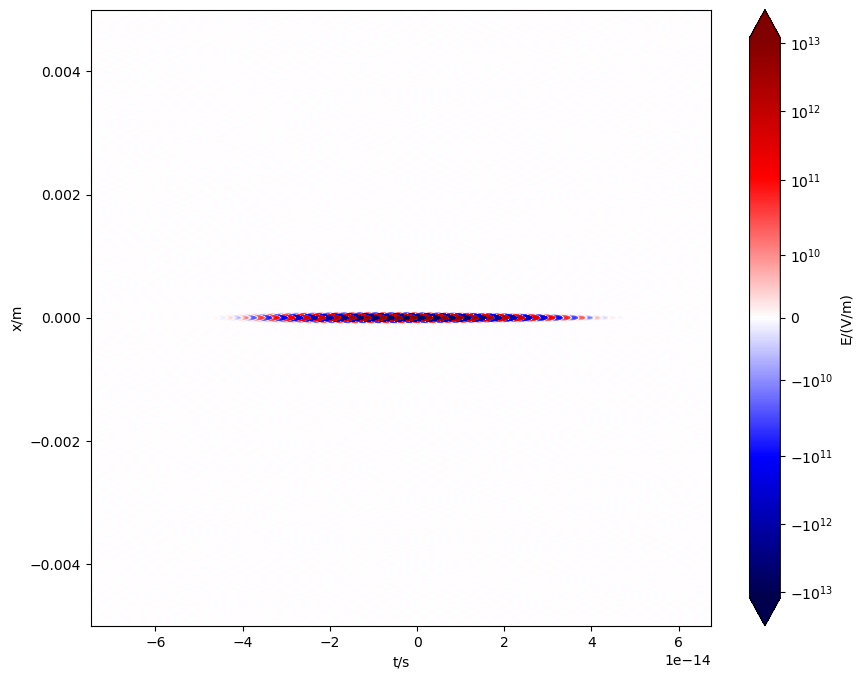

time: 10.077570366859437 min


In [9]:
full_field.show_field(laser, Nt=1024, offset_frac=offset_frac, forced_dt=des_dt, linthresh_frac=0.001)
ptime.ptime()

(1, 7054, 800)


  0%|          | 00:00<? [?it/s]

time: 12.234785004456837 min


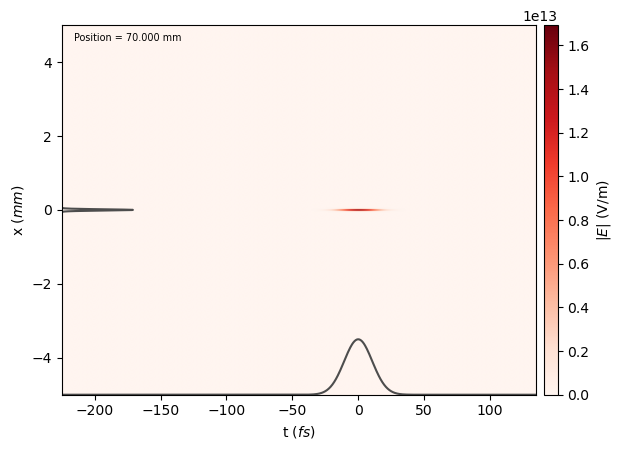

In [10]:
print(laser.grid.shape)
laser.propagate(zr)
laser.show()
ptime.ptime()

Extracting full field
Offsetting by 18.74 percent of the original field


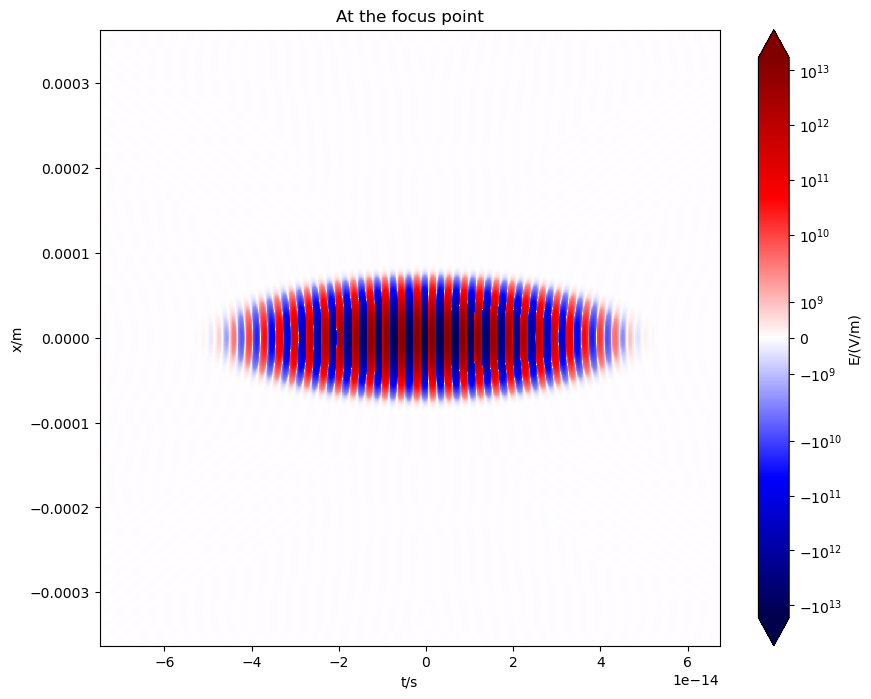

time: 12.329815300305684 min


In [11]:
full_field.show_field(laser, Nt=1024, Nr=512, offset_frac=offset_frac, forced_dt=des_dt, linthresh_frac=0.0001, title="At the focus point")
ptime.ptime()

In [12]:
print("w = ", get_w0(laser.grid, laser.dim))

w =  2.350558454857722e-05


  0%|          | 00:00<? [?it/s]

time: 14.488126957416535 min


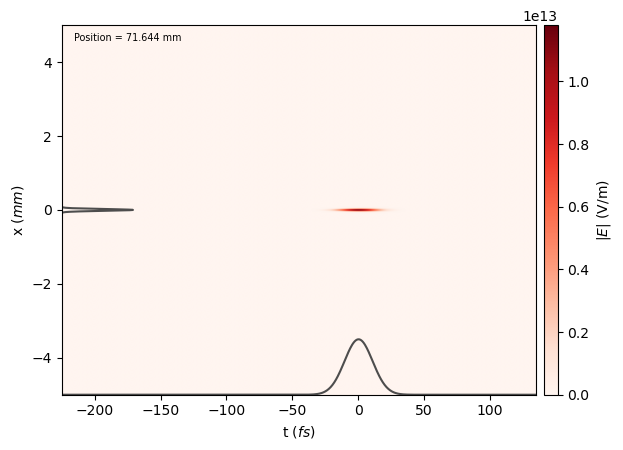

In [13]:
laser.propagate(zr)
laser.show()
ptime.ptime()

Extracting full field
Offsetting by 18.74 percent of the original field


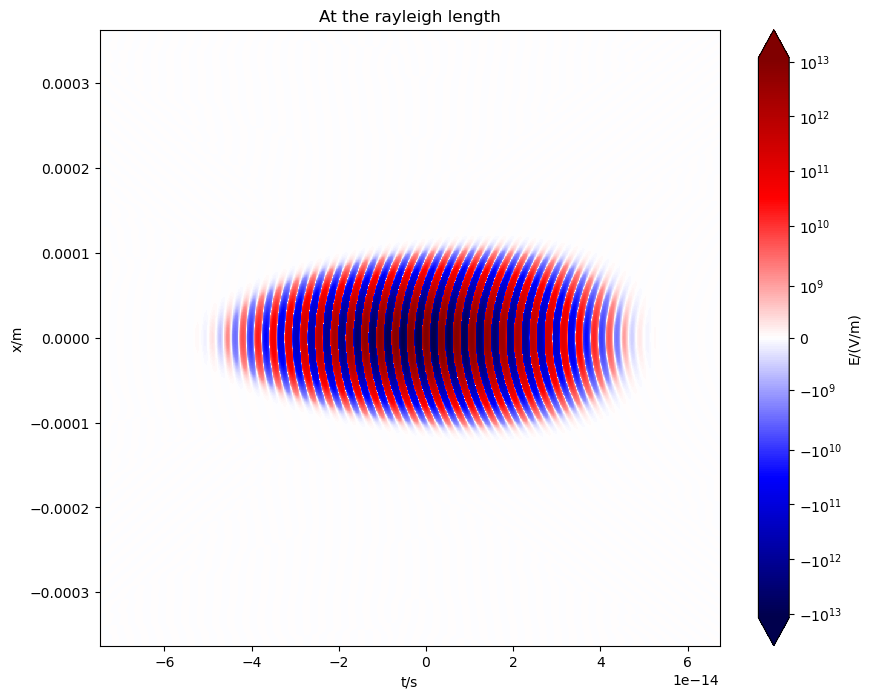

time: 14.550433691342672 min


In [14]:
full_field.show_field(laser, Nt=1024, Nr=512, offset_frac=offset_frac, forced_dt=des_dt, linthresh_frac=0.0001, title="At the rayleigh length")
ptime.ptime()